In [1]:
import math
import numpy
from matplotlib import pyplot
%matplotlib inline


# Importing the x,y and the strength values of the aerofoil

In [2]:
M=51
x_begin=-1 
x_end=2
y_begin=-0.5
y_end=0.5
x=numpy.linspace(x_begin,x_end,M)
y=numpy.linspace(y_begin,y_end,M)
X,Y=numpy.meshgrid(x,y)


In [3]:
u_infinite = 1.0
u_free = u_infinite*numpy.ones((M,M),dtype=float)
v_free = numpy.zeros((M,M),dtype=float)
si_stream=u_infinite*y

## Set of sources and computing their velocities

In [4]:

sigma_naca = numpy.loadtxt ('NACA0012_sigma.txt')
x_naca = numpy.loadtxt ('NACA0012_x.txt')
y_naca = numpy.loadtxt ('NACA0012_y.txt')
numpy.size(x_naca)




U1 = numpy.ndarray([M, M, numpy.size(x_naca)],dtype = float)           
V1 = numpy.ndarray([M, M, numpy.size(x_naca)],dtype = float)
psi1 = numpy.ndarray([M, M, numpy.size(x_naca)],dtype = float)

for i in range (0,numpy.size(x_naca)-1):
    U1[:,:,i]=sigma_naca[i]/(2*numpy.pi)*(X-x_naca[i])/((X-x_naca[i])**2+(Y-y_naca[i])**2)
    V1[:,:,i] = sigma_naca[i]/(2*numpy.pi)*(Y-y_naca[i])/((X-x_naca[i])**2+(Y-y_naca[i])**2)
    psi1[:,:,i] = sigma_naca[i]/(2*numpy.pi)*numpy.arctan2((Y-y_naca[i]),(X-x_naca[i]))

U=u_free+numpy.sum(U1,axis=2)
V=v_free+numpy.sum(V1, axis=2)
psi = si_stream + numpy.sum(psi1, axis=2)

print(numpy.size(U))
   


2601


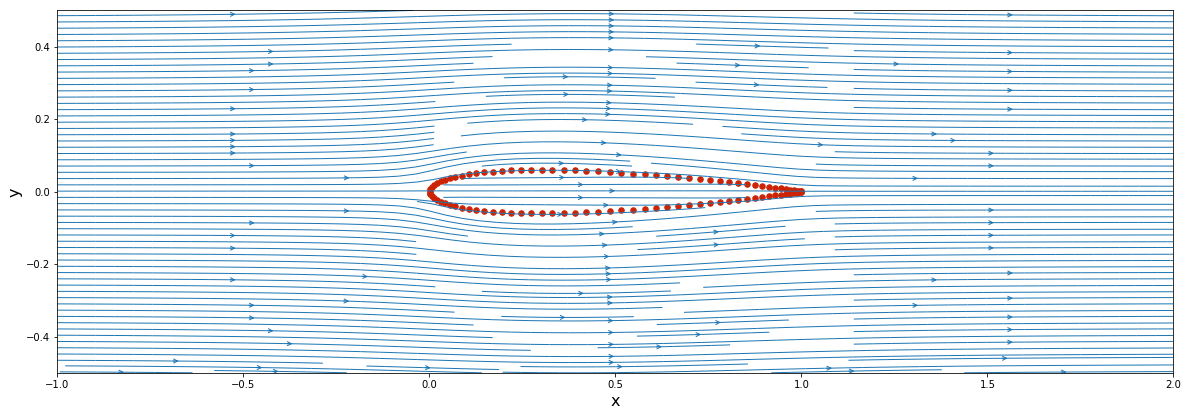

In [5]:
size = 20
pyplot.figure(figsize = (size, (y_end-y_begin)/(x_end - x_begin)*size))
pyplot.xlabel('x',fontsize = 16)
pyplot.ylabel('y',fontsize = 16)
pyplot.xlim(x_begin,x_end)
pyplot.ylim(y_begin,y_end)
pyplot.streamplot(X,Y,U,V, density = 2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_naca ,y_naca, color = '#CD2305', s=30, marker = 'o')

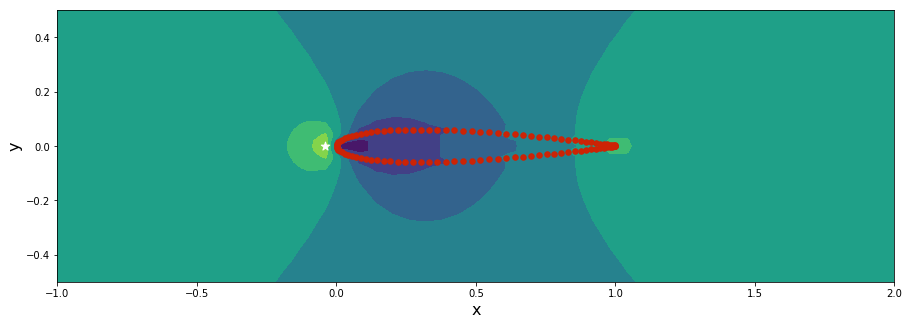

In [6]:
cp = 1.0 - (U**2+V**2)/u_infinite           #cp calculations
 
cp_max = numpy.max(cp)
x_maxcp, y_maxcp = numpy.where (cp == numpy.max(cp))

# Plotting pressure field
size = 15
pyplot.figure(figsize = (size, (y_end-y_begin)/(x_end - x_begin)*size))
pyplot.xlabel('x',fontsize = 16)
pyplot.ylabel('y',fontsize = 16)
pyplot.xlim(x_begin,x_end)
pyplot.ylim(y_begin, y_end)
contf = pyplot.contourf(X, Y, cp, extend = 'both')


pyplot.scatter(x_naca, y_naca, color = '#CD2305', s=30, marker = 'o')
pyplot.scatter(X[x_maxcp,y_maxcp],Y[x_maxcp,y_maxcp], color = 'white', s=80, marker='*')




## maximum value of Cp= 0.47

In [14]:
print (cp_max) #cpmax value

0.471878375128


In [38]:
X[x_maxcp,y_maxcp],Y[x_maxcp,y_maxcp]
       
for i in range (0,50):
    for j in range(0, 50):
        if cp[i][j]==cp_max:
          print("Index values=", i,j)
          break


Index values= 25 16


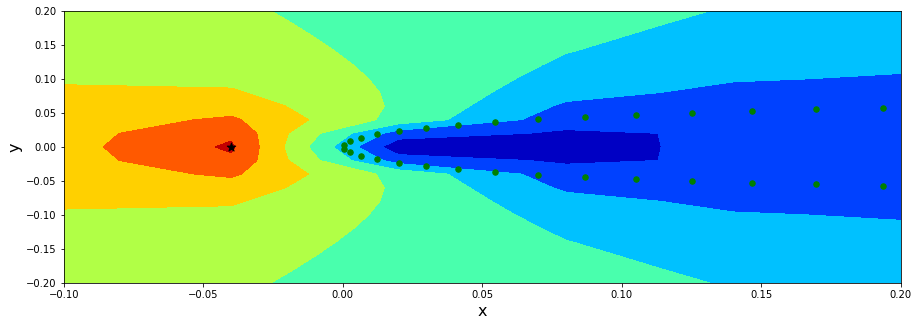

In [8]:
pyplot.figure(figsize = (size, (y_end-y_begin)/(x_end - x_begin)*size))            # Plotting the contour for Cp values
pyplot.xlabel('x',fontsize = 16)
pyplot.ylabel('y',fontsize = 16)
pyplot.xlim(-0.1,0.2)
pyplot.ylim(-0.2, 0.2)
contf = pyplot.contourf(X, Y, cp, extend = 'both', cmap = 'jet') 

pyplot.scatter(x_naca, y_naca, color = 'green', s=30, marker = 'o')
pyplot.scatter(X[x_maxcp,y_maxcp],Y[x_maxcp,y_maxcp], color = 'black', s=80, marker='*')